Google Play Store serves as the official app store for the Android operating system, allowing users to browse and download applications. Success of an app is largely determined by its ratings.

But is there any particular pattern among high rated apps? Does size or genre of the app play a role in determining its high rating?

Let's find out.

The dataset has details of 10841 apps with following 13 features



In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "/Users/herambdharmadhikari/Downloads/PlayStore.csv"

In [108]:
data = pd.read_csv(path)

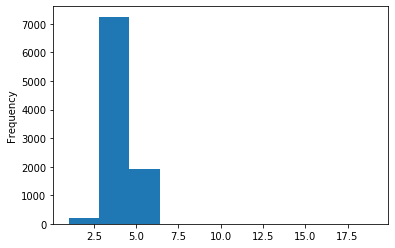

In [109]:
## Plot a histogram of Rating column to see the distribution of app ratings
data['Rating'].plot(kind='hist')   


You can see from the plotted histogram that there exists Rating>5 which shouldn't be there

Subset the dataframe 'data' such that it only contains rows where Rating is less than or equal to 5. Save the subsetted dataframe back into 'data'.

Plot a histogram of Rating column again to see the distribution of app ratings

In [110]:
data=data[data['Rating']<=5]

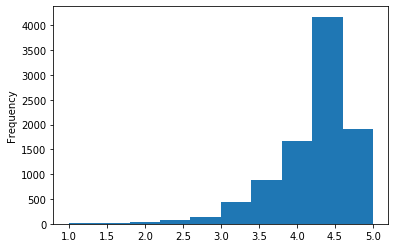

In [111]:
data['Rating'].plot(kind='hist')   

Average rating of application in store is around 4 which is very high

In [112]:
## Null Value Treatment
total_null = data.isnull().sum()

In [113]:
percent_null = (total_null/data.isnull().count())

In [114]:
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])

In [115]:
print(missing_data)

                Total   Percent
App                 0  0.000000
Category            0  0.000000
Rating              0  0.000000
Reviews             0  0.000000
Size                0  0.000000
Installs            0  0.000000
Type                0  0.000000
Price               0  0.000000
Content Rating      0  0.000000
Genres              0  0.000000
Last Updated        0  0.000000
Current Ver         4  0.000427
Android Ver         2  0.000214


In [116]:
## Cleaning the data ##
## Dropping NA values
data.dropna(axis=1,inplace=True)
total_null_1 = data.isnull().sum()
percent_null_1 = (total_null_1/data.isnull().count())
missing_data_1 = pd.concat([total_null_1,percent_null_1], axis=1,keys=['Total','Percent'])
print(missing_data_1)

                Total  Percent
App                 0      0.0
Category            0      0.0
Rating              0      0.0
Reviews             0      0.0
Size                0      0.0
Installs            0      0.0
Type                0      0.0
Price               0      0.0
Content Rating      0      0.0
Genres              0      0.0
Last Updated        0      0.0


## Let's first check if category and ratings have any sort of relation

Text(0.5, 1, 'Rating vs Category [BoxPlot]')

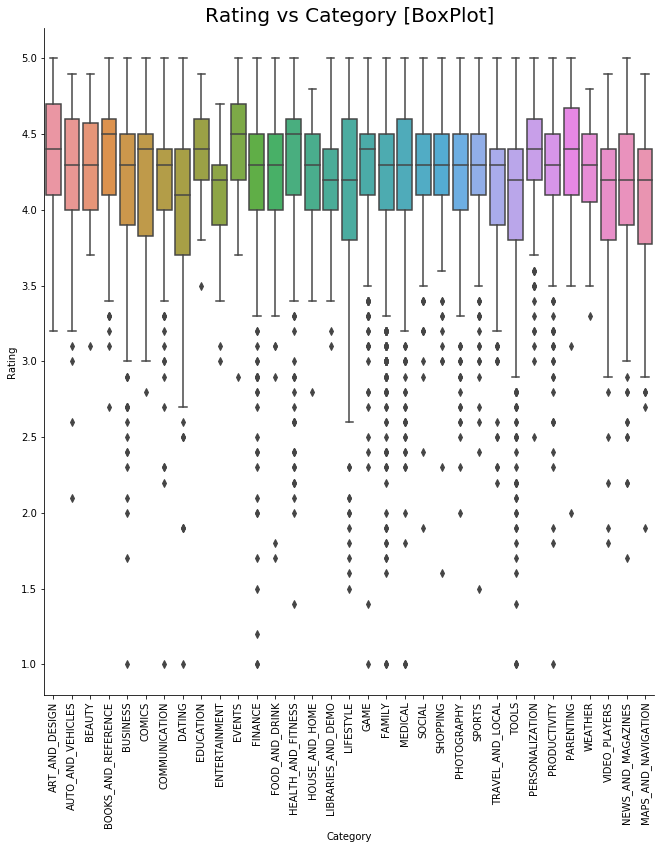

In [117]:
## Using catplot
sns.catplot(x='Category',y='Rating',data=data,kind="box",height=10).set_xticklabels(rotation=90)
plt.title('Rating vs Category [BoxPlot]',size = 20)

## Observation
 Rating of application in each category doesn't vary with each other much.

In [118]:
print(data['Installs'].value_counts())


1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64


In [119]:
## Observations
#The column Installs is not of type int

#The values have a large range(0- 500M)
data['Installs']=data['Installs'].str.replace('+','')
data['Installs']=data['Installs'].str.replace(',','')

In [120]:
data['Installs'].astype(int)

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int64

In [121]:
print(data['Installs'].value_counts())


1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64


Text(0.5, 1.0, 'Rating vs Category [BoxPlot]')

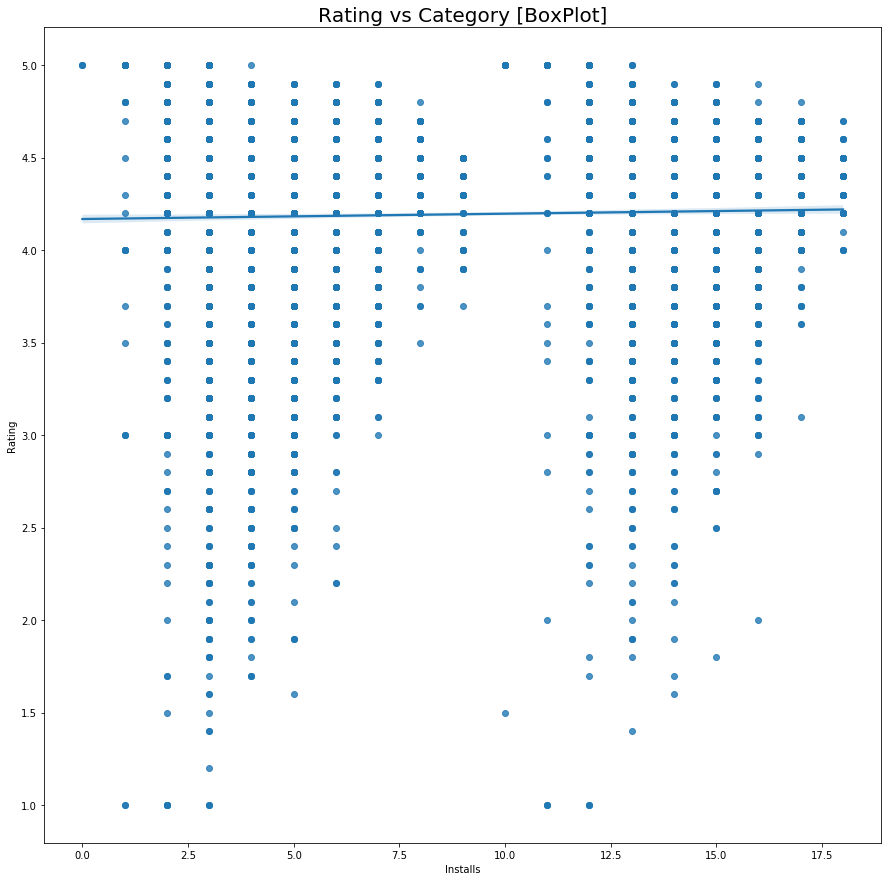

In [122]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
le = LabelEncoder()
plt.figure(figsize = (15,15))
data['Installs'] = le.fit_transform(data['Installs'])
sns.regplot(x='Installs',y='Rating',data=data)
plt.title('Rating vs Category [BoxPlot]',size = 20)

##Regplot help us to se if there is any relation between two labeles by plottingb Linear regression line

# Observation 
There is but a small positive correlation between the number of installs and ratings


In [123]:
print(data['Price'].value_counts())


0         8719
$2.99      114
$0.99      107
$4.99       70
$1.99       59
          ... 
$3.90        1
$3.02        1
$4.59        1
$39.99       1
$19.40       1
Name: Price, Length: 73, dtype: int64


Text(0.5, 1.0, 'Rating vs Price[Reg Plot]')

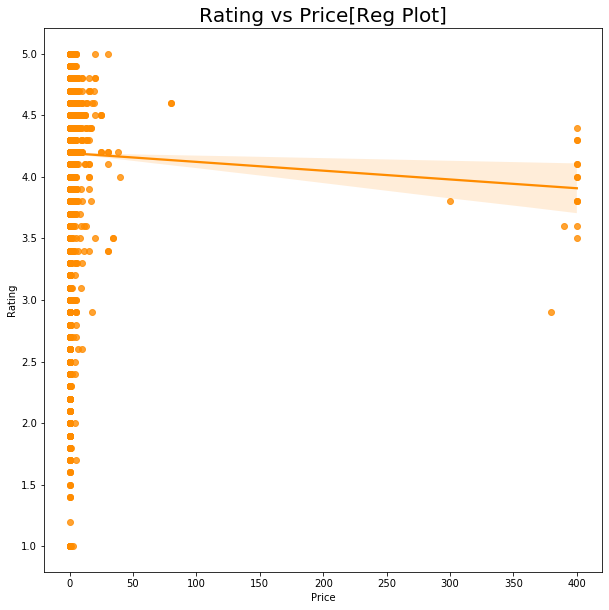

In [124]:
#Code starts here


#Removing the dollar sign from the column
data['Price'] = data['Price'].str.replace('$','')

#Converting the column to float
data['Price'] = data['Price'].astype(float)

#Setting the figure size
plt.figure(figsize = (10,10))

#Plotting Regression plot between Rating and Price
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=data)

#Setting the plot title
plt.title('Rating vs Price[Reg Plot]',size = 20)

#Code ends here


There is a negative correlation between price and ratings. Higher price applications may make customers disappointed if they are not good enough.

In [125]:
print( len(data['Genres'].unique()) , "genres")

115 genres


The column Genres has 115 unique values

Some of the apps have multiple genres hence resulting in 115 unique combinations

In [126]:
data['Genres'] = data['Genres'].str.split(';').str[0]
gr_mean=data[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean()
print(gr_mean.describe())
gr_mean=gr_mean.sort_values('Rating')

print(gr_mean.head(1))

print(gr_mean.tail(1))

          Rating
count  48.000000
mean    4.212051
std     0.103459
min     3.970769
25%     4.132114
50%     4.204821
75%     4.286532
max     4.435556
    Genres    Rating
14  Dating  3.970769
    Genres    Rating
18  Events  4.435556


Observations
The lowest of average rating on genres (Dating) is 3.97

The highest of average rating on genres (Events) is 4.43

Owing to Standard Deviation of 0.1, seems like a genre doesn't have much effect on rating

## Last Updated vs Rating

In [127]:
print(data['Last Updated'])

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10834       June 18, 2017
10836       July 25, 2017
10837        July 6, 2018
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 9366, dtype: object


In [128]:
## convert into datetime format
data['Last Updated']= pd.to_datetime(data['Last Updated']) 

In [129]:
print(data['Last Updated'])

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10834   2017-06-18
10836   2017-07-25
10837   2018-07-06
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9366, dtype: datetime64[ns]


In [135]:
# Find out max date
max_date = data['Last Updated'].max()
# Last Updated Days
data['Last Updated Days'] = (data['Last Updated'].max()-data['Last Updated'] ).dt.days

Text(0.5, 1.0, 'Rating vs Last Updated [RegPlot]')

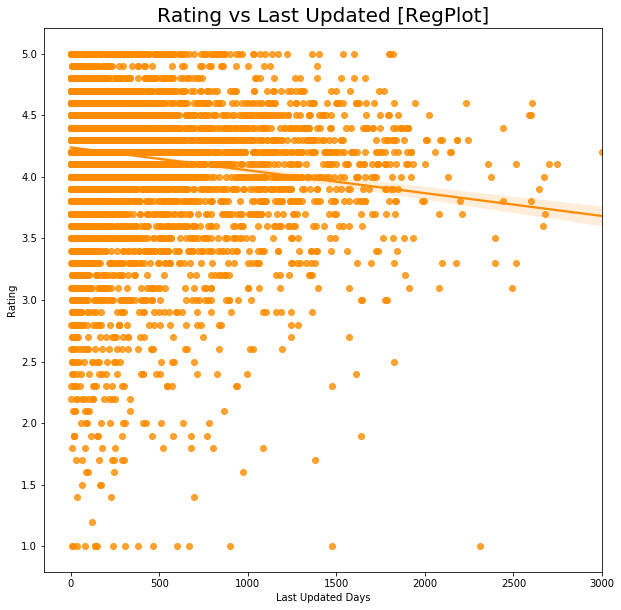

In [136]:
plt.figure(figsize = (10,10))
sns.regplot(x="Last Updated Days", y="Rating", color = 'darkorange',data=data)
plt.title('Rating vs Last Updated [RegPlot]',size = 20)

# Observation
Higher the gap between the days last updated, lower the rating